# Halo experimentation
# 6/27/24

In [1]:
import matplotlib as mpl
mpl.use('Agg')
from matplotlib import pyplot as plt
import yt
yt.enable_parallelism()
import numpy as np
from yt.frontends.gizmo.api import GizmoDataset
import sys
from scipy.signal import gaussian
from scipy.ndimage import filters
import os
import cmocean
from radial_profile1 import find_center_iteratively
from astropy.io import fits

yt : [ERROR    ] 2024-06-27 01:02:30,760 Could not enable parallelism: only one mpi process is running. To remedy this, launch the Python interpreter as
  mpirun -n <X> python3 <yourscript>.py  # with X > 1 
[dhcp-194-236.caltech.edu:53542] shmem: mmap: an error occurred while determining whether or not /var/folders/7q/qfsy4gkn1v94_r366nrxc3kw0000gn/T//ompi.dhcp-194-236.501/jf.0/1104805888/sm_segment.dhcp-194-236.501.41da0000.0 could be created.


In [2]:
fn = "../runs/m12i_res450000/output/snapshot_570.hdf5"

ds = GizmoDataset(fn)

yt : [INFO     ] 2024-06-27 01:02:32,598 Calculating time from 9.666e-01 to be 4.206e+17 seconds
yt : [INFO     ] 2024-06-27 01:02:32,599 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-06-27 01:02:32,706 Parameters: current_time              = 4.206116393886909e+17 s
yt : [INFO     ] 2024-06-27 01:02:32,708 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-06-27 01:02:32,710 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-27 01:02:32,711 Parameters: domain_right_edge         = [60000. 60000. 60000.]
yt : [INFO     ] 2024-06-27 01:02:32,712 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-06-27 01:02:32,712 Parameters: current_redshift          = 0.034596389698506425
yt : [INFO     ] 2024-06-27 01:02:32,713 Parameters: omega_lambda              = 0.728
yt : [INFO     ] 2024-06-27 01:02:32,714 Parameters: omega_matter              = 0.272
yt : [INFO     ] 2024-06-27 01:02:32,714 Parameters: omega_radiatio

In [3]:
c = find_center_iteratively(fn, ds=ds)
#c = read_amiga_center(amiga_data, fn, ds)
#_, c = ds.find_max('density')
rvir = ds.quan(30, 'kpc')
sp = ds.sphere(c, rvir)
bulk_vel = sp.quantities.bulk_velocity()
#print("Bulk Velocity of Halo = %s" % bulk_vel.to('km/s'))
sp.set_field_parameter("bulk_velocity", bulk_vel)

Pass 0: 362032 particles
   radius = 5036.437522
Pass 1: 362031 particles
   radius = 3102.882576
Pass 2: 362030 particles
   radius = 2680.142077
Pass 3: 362026 particles
   radius = 2402.227419
Pass 4: 362021 particles
   radius = 2126.064088
Pass 5: 361577 particles
   radius = 1911.419922
Pass 6: 344016 particles
   radius = 1804.584971
Pass 7: 344002 particles
   radius = 1620.776799
Pass 8: 343872 particles
   radius = 1458.596338
Pass 9: 321872 particles
   radius = 1332.743988
Pass 10: 321858 particles
   radius = 1189.590374
Pass 11: 314223 particles
   radius = 1043.790161
Pass 12: 314218 particles
   radius = 894.019059
Pass 13: 314217 particles
   radius = 794.072511
Pass 14: 314216 particles
   radius = 554.981693
Pass 15: 314215 particles
   radius = 493.851253
Pass 16: 314212 particles
   radius = 443.270946
Pass 17: 314210 particles
   radius = 387.916205
Pass 18: 314208 particles
   radius = 346.720524
Pass 19: 314185 particles
   radius = 311.769281
Pass 20: 314181 pa

yt : [INFO     ] 2024-06-27 01:02:35,518 Allocating for 4.794e+06 particles
Loading particle index: 100%|█████████████████| 10/10 [00:00<00:00, 3028.60it/s]


In [15]:
ax = [0,1,0]

In [16]:
ad = ds.all_data()
ad.set_field_parameter('center', c)
ad.set_field_parameter('bulk_velocity', bulk_vel)
ad.set_field_parameter('normal', np.array(ax))

In [6]:
# using smoothing length as an analog for the size of the gas region
def _H_I_number(field, data):
    return data[('gas', 'H_number_density')] * (4./3. * 3.14 * data[('gas', 'smoothing_length')]**3)

# This is to correct a problem in the tip of yt-4 that messes up the units
# of cylindrical radius to be a factor of kpc/cm too low
def _cylindrical_radius_kpc(field, data):
    return data[('gas', 'cylindrical_radius')] / (3e21)

yt.add_field(("gas","H_I_number"), function=_H_I_number, units="", sampling_type='particle')
yt.add_field(("PartType0","cylindrical_radius_kpc"), function=_cylindrical_radius_kpc, units="cm", sampling_type='particle')

In [31]:
my_sphere = ds.sphere("c", (10.0, "Mpc"))
plot = yt.ProfilePlot(
    my_sphere,
    ("gas", "density"), [("gas", "temperature")]
)
plot.save()

yt : [INFO     ] 2024-06-27 00:56:54,165 Saving plot snapshot_570_1d-Profile_density_temperature.png


['snapshot_570_1d-Profile_density_temperature.png']

In [33]:
ds.derived_field_list

[('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density'),
 ('PartType0', 'H_p1_fraction'),
 ('PartType0', 'H_p1_mass'),
 ('PartType0', 'H_p1_number_density'),
 ('PartType0', 'He_metallicity'),
 ('PartType0', 'He_nuclei_density'),
 ('PartType0', 'He_nuclei_mass_density'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metalli


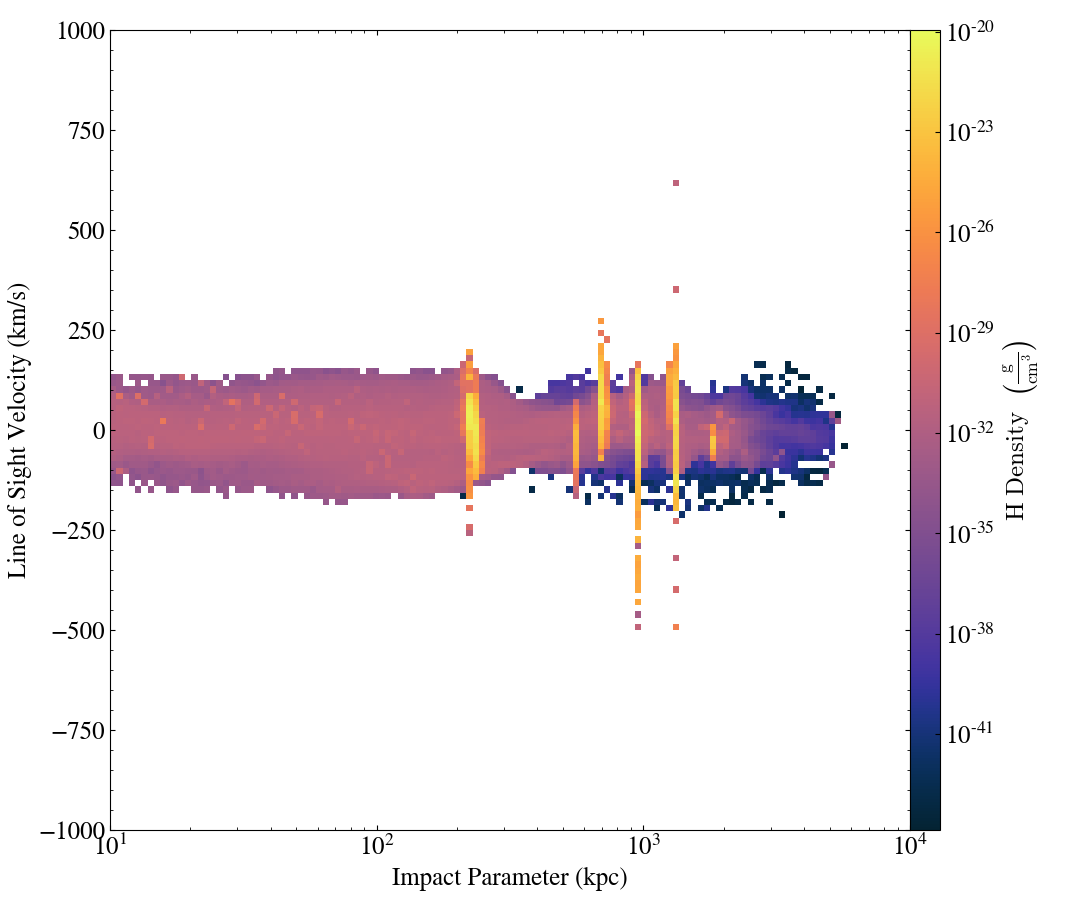

In [17]:
p = yt.PhasePlot(ad, ('gas', 'cylindrical_radius'), ('PartType0', 'velocity_cylindrical_z'), ('gas', 'H_density'), weight_field=None)
p.set_unit(('gas', 'cylindrical_radius'), 'kpc')
p.set_unit(('PartType0', 'velocity_cylindrical_z'), 'km/s')
p.set_log(('PartType0', 'velocity_cylindrical_z'), False)
p.set_xlim(1e1, 1e4)
p.set_ylim(-1000,1000)
p.set_cmap(('gas', 'H_density'), cmocean.cm.thermal)
#p.set_zlim(('gas', 'H_I_number'), 1e12, 1e25)
p.set_xlabel('Impact Parameter (kpc)')
p.set_ylabel('Line of Sight Velocity (km/s)')
p.show()